In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configure plotting style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/datasets/adpetrovic/project-01-eda/Project-01-EDA.csv


### 1. Load and Prepare Data
Note: If running on Kaggle, ensure the file path matches your input directory.

In [5]:
# Load the dataset
df = pd.read_csv('/kaggle/input/datasets/adpetrovic/project-01-eda/Project-01-EDA.csv')

# Feature Engineering: Age Group
def get_age_group(age):
    if pd.isnull(age): return 'Unknown'
    if age < 18: return 'Child'
    elif age <= 60: return 'Adult'
    else: return 'Senior'

df['Age_Group'] = df['Age'].apply(get_age_group)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Adult
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Adult


### 2. Distribution Charts

/tmp/ipykernel_55/1744668092.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='SibSp', ax=axes[1,0], palette='viridis').set_title('Siblings/Spouses Distribution')
/tmp/ipykernel_55/1744668092.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Parch', ax=axes[1,1], palette='magma').set_title('Parents/Children Distribution')


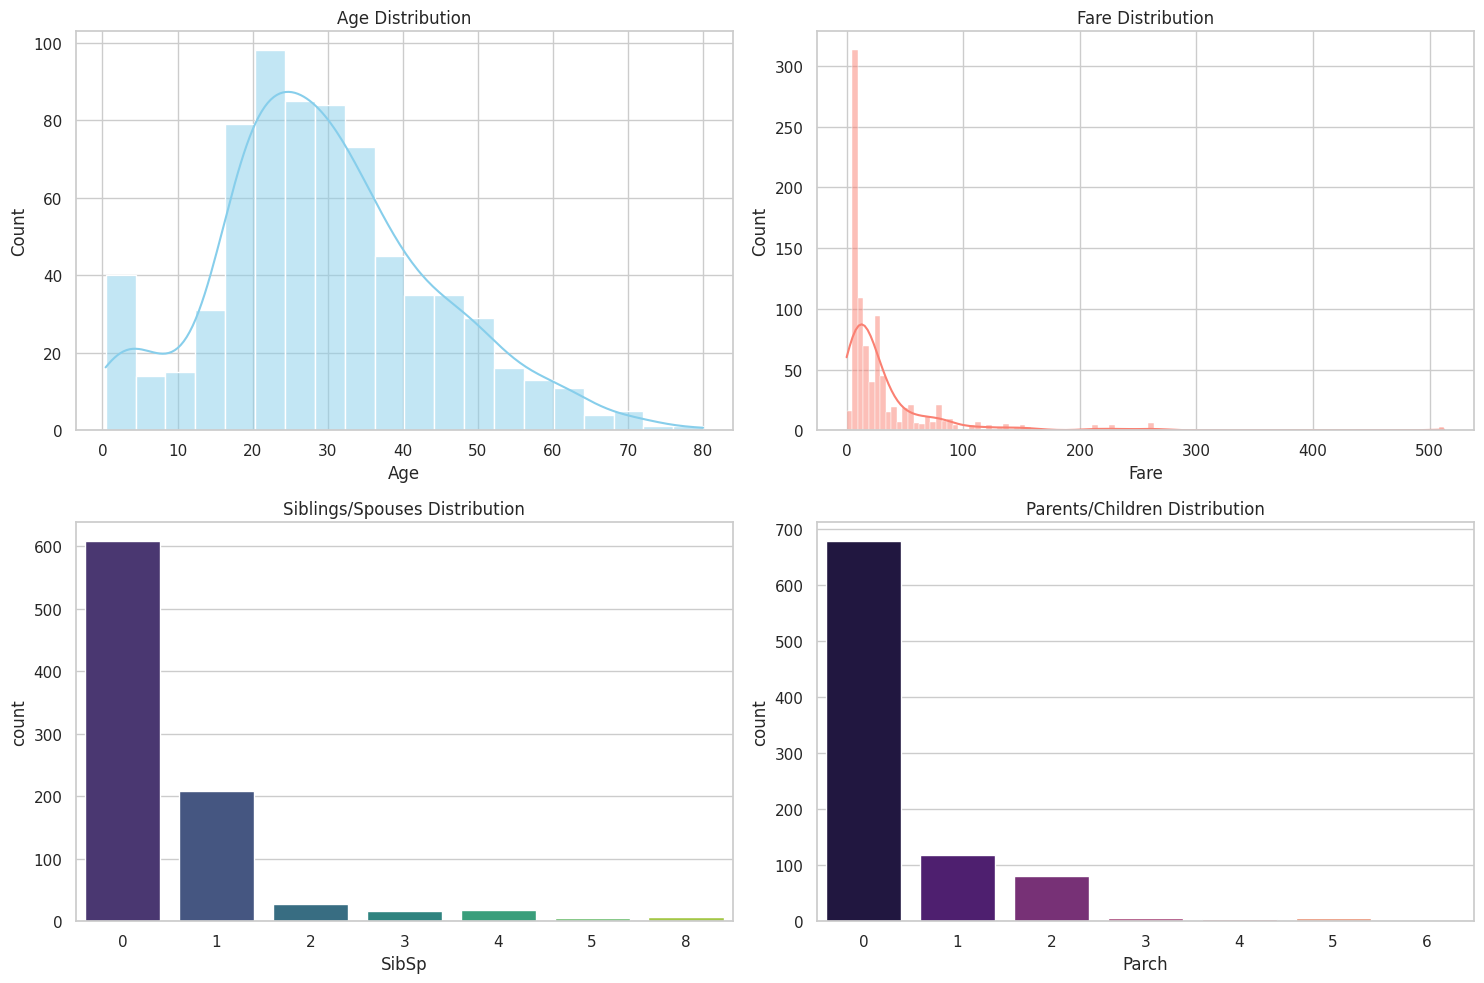

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(df['Age'].dropna(), kde=True, ax=axes[0,0], color='skyblue').set_title('Age Distribution')
sns.histplot(df['Fare'], kde=True, ax=axes[0,1], color='salmon').set_title('Fare Distribution')
sns.countplot(data=df, x='SibSp', ax=axes[1,0], palette='viridis').set_title('Siblings/Spouses Distribution')
sns.countplot(data=df, x='Parch', ax=axes[1,1], palette='magma').set_title('Parents/Children Distribution')

plt.tight_layout()
plt.show()

### 3. Categorical Charts

/tmp/ipykernel_55/1911397793.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pclass', palette='Set2')
/tmp/ipykernel_55/1911397793.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Embarked', palette='Set1')


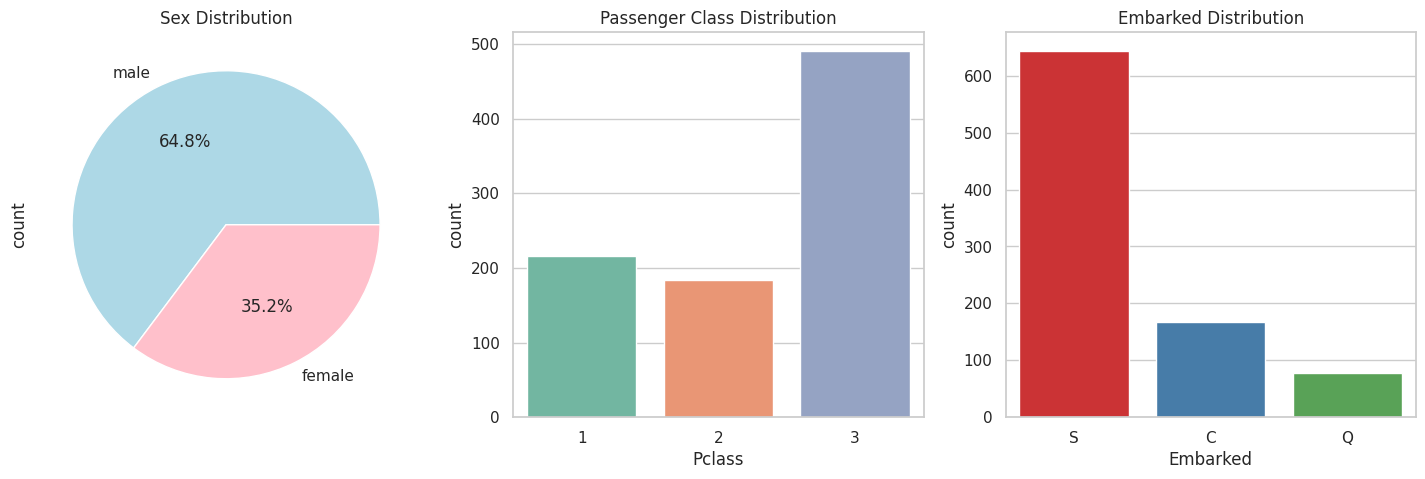

In [7]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Sex Distribution')

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='Pclass', palette='Set2')
plt.title('Passenger Class Distribution')

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='Embarked', palette='Set1')
plt.title('Embarked Distribution')

plt.show()

### 4. Survival-Related Charts

/tmp/ipykernel_55/424365559.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Sex', y='Survived', ax=axes[0,0], ci=None).set_title('Survival by Sex')
/tmp/ipykernel_55/424365559.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Pclass', y='Survived', ax=axes[0,1], ci=None).set_title('Survival by Pclass')
/tmp/ipykernel_55/424365559.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Embarked', y='Survived', ax=axes[1,0], ci=None).set_title('Survival by Port')
/tmp/ipykernel_55/424365559.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Age_Group', y='Survived', order=['Child', 'Adult', 'Senior', 'Unknown'], ax=axes[1,1], ci=None).set_title('Survival by Age Group')


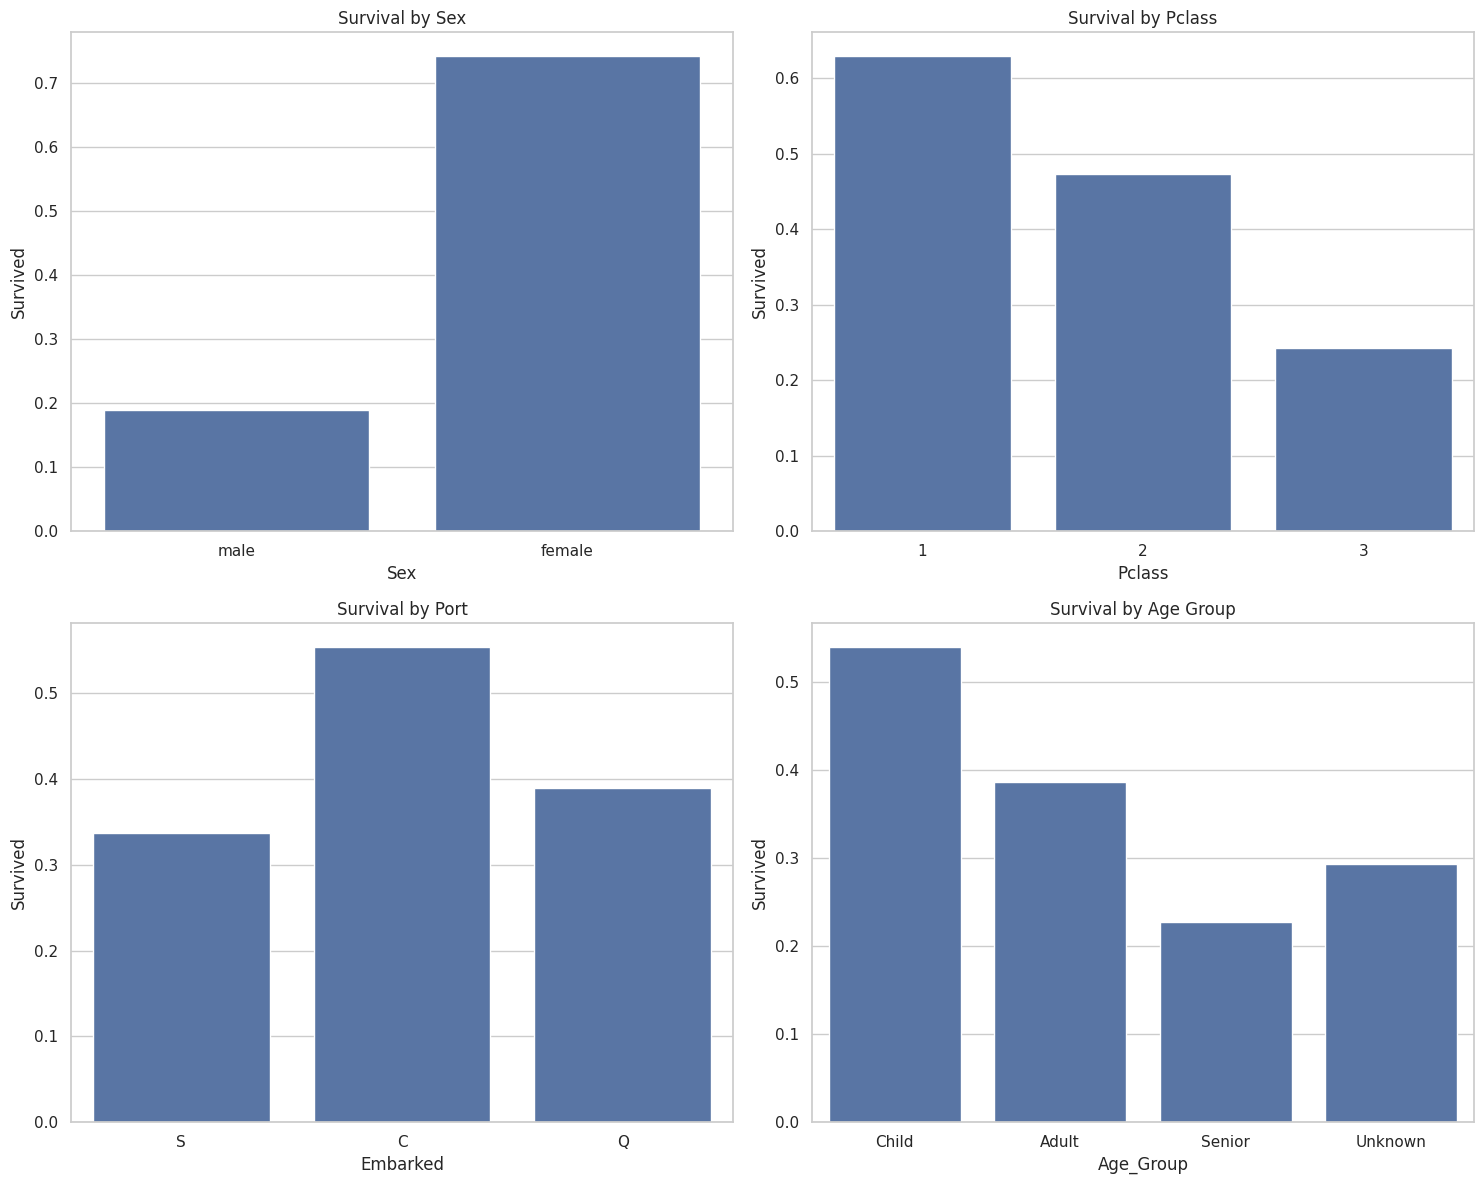

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.barplot(data=df, x='Sex', y='Survived', ax=axes[0,0], ci=None).set_title('Survival by Sex')
sns.barplot(data=df, x='Pclass', y='Survived', ax=axes[0,1], ci=None).set_title('Survival by Pclass')
sns.barplot(data=df, x='Embarked', y='Survived', ax=axes[1,0], ci=None).set_title('Survival by Port')
sns.barplot(data=df, x='Age_Group', y='Survived', order=['Child', 'Adult', 'Senior', 'Unknown'], ax=axes[1,1], ci=None).set_title('Survival by Age Group')

plt.tight_layout()
plt.show()

### 5. Correlation & Outliers

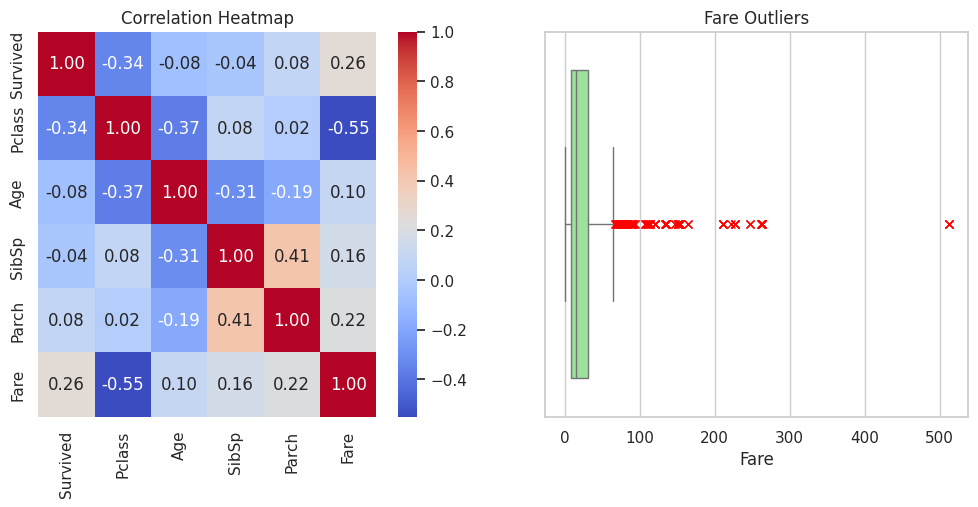

In [9]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'], color='lightgreen', flierprops=dict(marker='x', markeredgecolor='red'))
plt.title('Fare Outliers')

plt.show()

# Titanic EDA: Comprehensive Visualizations
This notebook performs an Exploratory Data Analysis (EDA) on the Titanic dataset, covering distributions, categorical analysis, and survival correlations.